Following notebook by [Spider Pig](https://www.kaggle.com/apartmentguru/d/wendykan/lending-club-loan-data/exploratory-lending)

In [1]:
import numpy as np
from scipy.stats import kendalltau
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv("loan.csv", low_memory=False)

In [3]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()
df.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

<bound method NDFrame.describe of               id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0        1077501    1296599     5000.0       5000.0      4975.000000   
1        1077430    1314167     2500.0       2500.0      2500.000000   
2        1077175    1313524     2400.0       2400.0      2400.000000   
3        1076863    1277178    10000.0      10000.0     10000.000000   
4        1075358    1311748     3000.0       3000.0      3000.000000   
5        1075269    1311441     5000.0       5000.0      5000.000000   
6        1069639    1304742     7000.0       7000.0      7000.000000   
7        1072053    1288686     3000.0       3000.0      3000.000000   
8        1071795    1306957     5600.0       5600.0      5600.000000   
9        1071570    1306721     5375.0       5375.0      5350.000000   
10       1070078    1305201     6500.0       6500.0      6500.000000   
11       1069908    1305008    12000.0      12000.0     12000.000000   
12       1064687    1298717   

In [6]:
df['funded_amnt'].value_counts().sort_index()

500.0         11
550.0          1
600.0          6
700.0          3
725.0          1
750.0          1
800.0          3
850.0          1
900.0          4
925.0          1
950.0          1
1000.0      2591
1025.0         9
1050.0        22
1075.0        11
1100.0        74
1125.0        21
1150.0        20
1175.0        13
1200.0      1302
1225.0         7
1250.0        41
1275.0        31
1300.0       117
1325.0        38
1350.0        28
1375.0        19
1400.0       477
1425.0        11
1450.0       159
           ...  
34275.0        5
34300.0       26
34325.0        5
34350.0       44
34375.0        8
34400.0       14
34425.0       13
34450.0       10
34475.0      205
34500.0      111
34525.0        2
34550.0       66
34575.0       10
34600.0        5
34625.0       43
34650.0       12
34675.0        9
34700.0        9
34725.0       11
34750.0       54
34775.0        7
34800.0       75
34825.0        9
34850.0       11
34875.0       66
34900.0       14
34925.0        9
34950.0       

In [7]:
df['funded_amnt'].value_counts(sort=True)

10000.0    61744
12000.0    50090
15000.0    47094
20000.0    46744
35000.0    36230
8000.0     27857
5000.0     27153
6000.0     26193
25000.0    23848
16000.0    23621
24000.0    22233
18000.0    22060
30000.0    17540
28000.0    14887
7000.0     14125
14000.0    13330
21000.0    12038
9000.0     11133
4000.0     10524
3000.0      9705
13000.0     7589
11000.0     7407
9600.0      6891
7200.0      6439
17000.0     5898
14400.0     5817
22000.0     5362
7500.0      5360
2000.0      5090
4800.0      4342
           ...  
32700.0        7
33400.0        7
32275.0        7
31125.0        6
31875.0        6
29075.0        6
33625.0        6
34150.0        6
600.0          6
33125.0        5
34275.0        5
34600.0        5
33775.0        5
34325.0        5
30050.0        5
900.0          4
34175.0        4
32825.0        4
32925.0        4
800.0          3
32050.0        3
700.0          3
32575.0        3
34525.0        2
850.0          1
950.0          1
925.0          1
750.0         

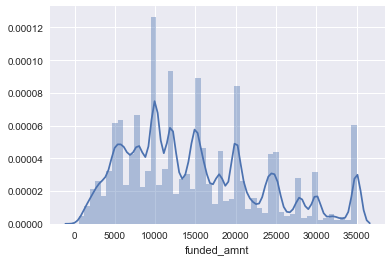

In [10]:
sns.distplot(df['funded_amnt'])

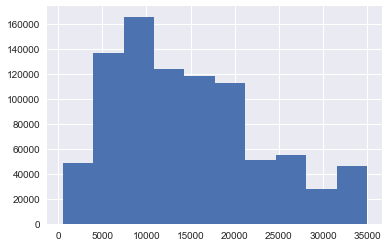

In [11]:
df['funded_amnt'].hist(bins=10)

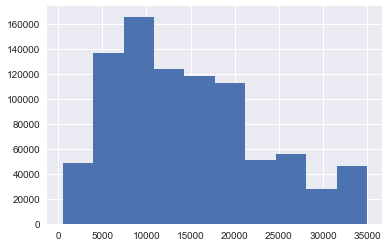

In [12]:
df['loan_amnt'].hist(bins=10)

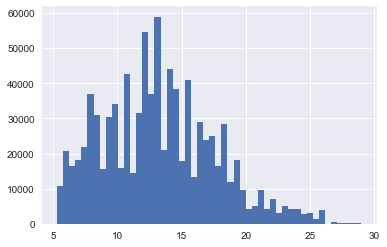

In [13]:
df['int_rate'].hist(bins=50)

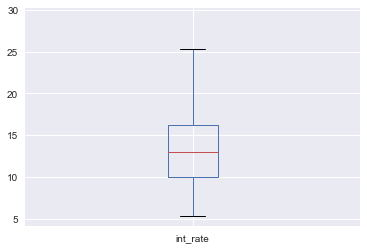

In [15]:
df.boxplot(column='int_rate')

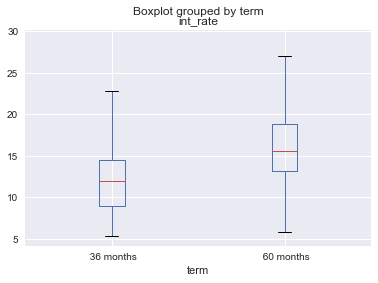

In [16]:
df.boxplot(column='int_rate', by='term')

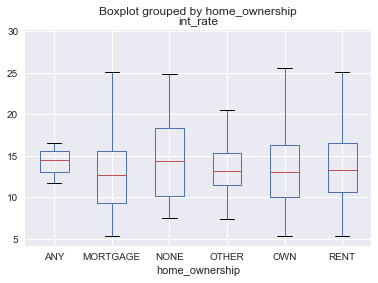

In [17]:
df.boxplot(column='int_rate', by='home_ownership')

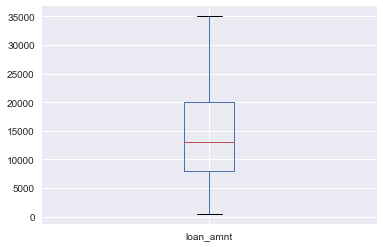

In [18]:
df.boxplot(column='loan_amnt')